In [1]:
import gzip
import numpy as np

def images(f):
    with gzip.open(f, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def labels(f):
    with gzip.open(f, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

In [2]:
training_images = images('train-images-idx3-ubyte.gz')
print(training_images.shape)
training_labels = labels('train-labels-idx1-ubyte.gz')
print(training_labels.shape)
testing_images  = images('t10k-images-idx3-ubyte.gz')
print(testing_images.shape)
testing_labels  = labels('t10k-labels-idx1-ubyte.gz')
print(testing_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print(training_labels)

[9 0 0 ... 3 0 5]


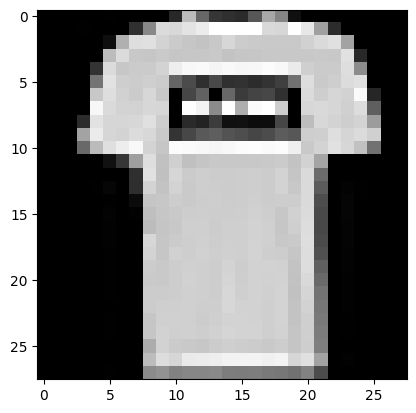

In [4]:
from matplotlib import pyplot as plt
pixels = training_images[1].reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()

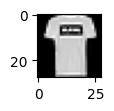

In [5]:
plt.subplot(5,5,1)
plt.imshow(training_images[1],cmap='gray')

In [6]:
X_train = training_images.reshape(60000,784)
X_test  = testing_images.reshape(10000,784)

# Change integers to 32-bit floating point numbers and normalize the datasets
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)
pca.n_components_

187

In [8]:
pca_all = PCA(n_components = 784)
# Fit on training data
pca_fit = pca_all.fit_transform(X_train)
#percentage variance explained
ratio_variance = np.cumsum(pca_all.explained_variance_ratio_)

In [9]:
pca_fit.shape

(60000, 784)

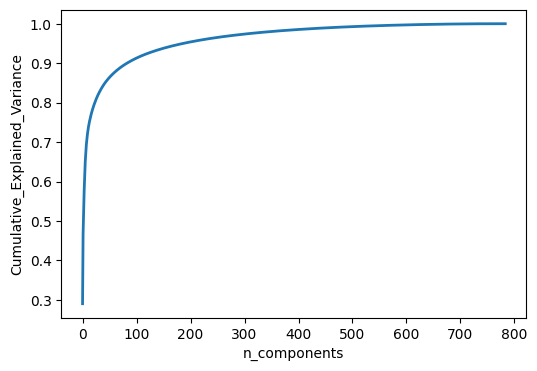

In [10]:
# Plot the PCA spectrum
plt.figure(figsize=(6, 4))
plt.plot(ratio_variance, linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cumulative_Explained_Variance")
plt.show()

In [11]:
label_mapping = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

def map_to_label(value):
    return label_mapping.get(int(value), 'Unknown')

# Apply the mapping function element-wise to the array
labels = np.vectorize(map_to_label)(training_labels)

In [12]:
import seaborn as sns

<Axes: >

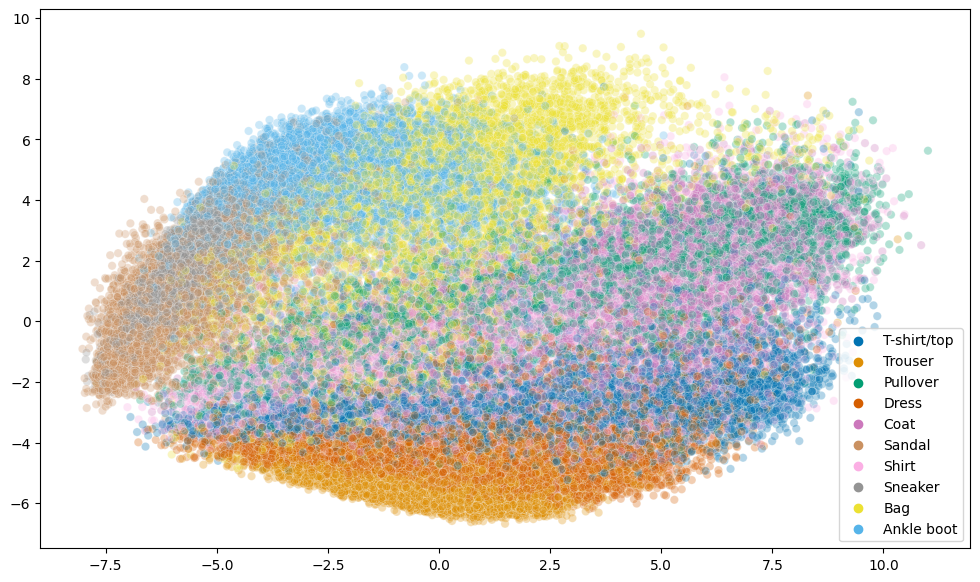

In [13]:
plt.figure(figsize=(12,7))
import seaborn as sns
sns.scatterplot(
    x=pca_fit[:,0], y=pca_fit[:,1],
    hue = labels,
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("colorblind", 10),
    legend="full",
    alpha=0.3
)

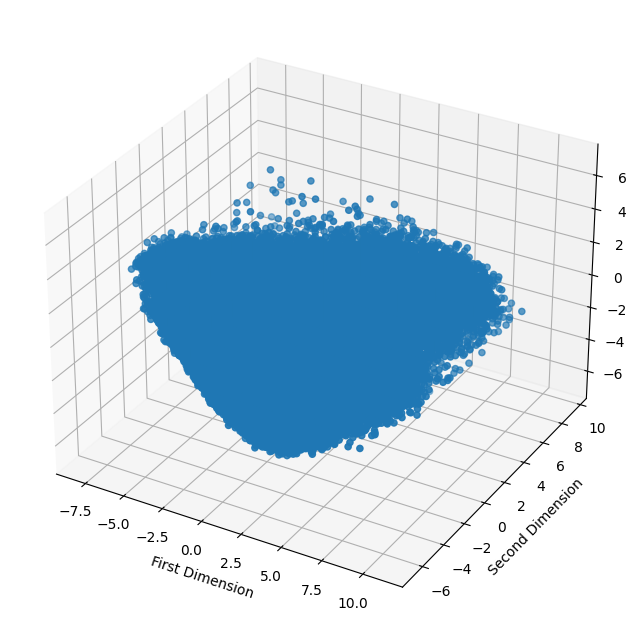

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    xs=pca_fit[:,0], ys=pca_fit[:,1], zs=pca_fit[:,2],
    #c=labels
)
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')
plt.show()

<Axes: >

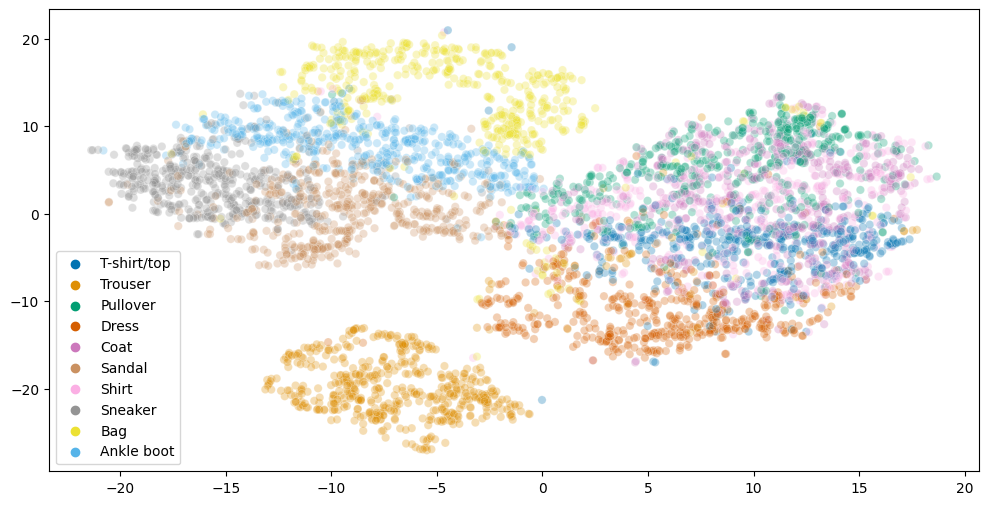

In [17]:
from sklearn.manifold import TSNE

# Invoking the t-SNE method
tsne = TSNE(n_components=3)
tsne_dt = X_train[:5000]
tsne_results = tsne.fit_transform(tsne_dt)

plt.figure(figsize=(12,6))
sns.scatterplot(x = tsne_results[:,0],
    y = tsne_results[:,1],
    hue=labels[:5000],
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("colorblind", 10),
    legend="full",
    alpha=0.3)

In [ ]:
X_train_t = pca.transform(X_train)
X_test_t  = pca.transform(X_test)

X_train_i = pca.inverse_transform(X_train_t)
X_test_i  = pca.inverse_transform(X_test_t)
reduced_training_images = X_train_i.reshape(60000,28,28)

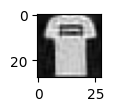

In [ ]:
plt.subplot(5,5,1)
plt.imshow(reduced_training_images[1],cmap='gray')

Epoch 1/20
371/375 [============================>.] - ETA: 0s - loss: 1.2347 - accuracy: 0.6863
Epoch 1: val_accuracy improved from -inf to 0.83117, saving model to fnn_model1.h5
375/375 [==============================] - 4s 8ms/step - loss: 1.2291 - accuracy: 0.6877 - val_loss: 0.6979 - val_accuracy: 0.8312
Epoch 2/20
373/375 [============================>.] - ETA: 0s - loss: 0.5653 - accuracy: 0.8494
Epoch 2: val_accuracy improved from 0.83117 to 0.85692, saving model to fnn_model1.h5
375/375 [==============================] - 2s 5ms/step - loss: 0.5649 - accuracy: 0.8495 - val_loss: 0.4897 - val_accuracy: 0.8569
Epoch 3/20
368/375 [============================>.] - ETA: 0s - loss: 0.4365 - accuracy: 0.8676
Epoch 3: val_accuracy improved from 0.85692 to 0.86625, saving model to fnn_model1.h5
375/375 [==============================] - 2s 5ms/step - loss: 0.4357 - accuracy: 0.8677 - val_loss: 0.4272 - val_accuracy: 0.8662
Epoch 4/20
373/375 [============================>.] - ETA: 0s - 

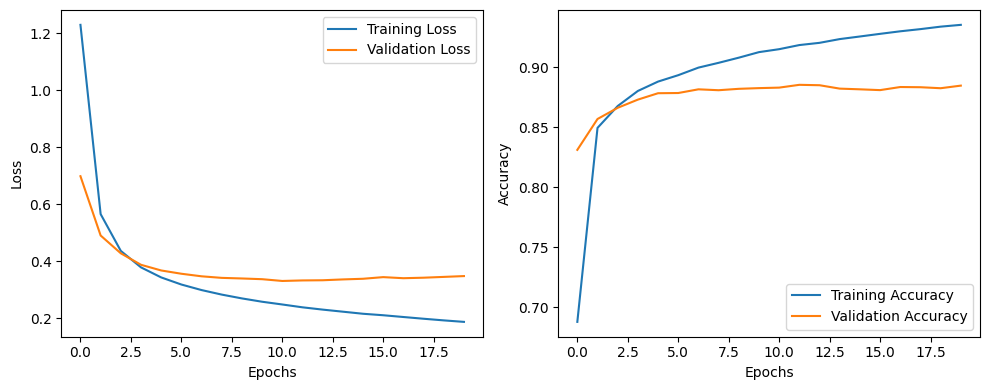

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

# Model checkpoint to save the best model based on validation accuracy
model_checkpoint = ModelCheckpoint('fnn_model1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

model = Sequential()
model.add(Dense(64, activation='relu',input_shape=X_train_t.shape[1:]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using PCA-transformed data
history = model.fit(X_train_t, to_categorical(training_labels), epochs=20, batch_size=128, validation_split=0.2, callbacks=[model_checkpoint])

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation of 2nd Model on testing set
from sklearn.metrics import confusion_matrix
from keras.models import load_model

best_model = load_model('fnn_model1.h5')
test_loss, test_accuracy = best_model.evaluate(X_test_t, to_categorical(testing_labels))
print(f"Testing Accuracy on best model: {test_accuracy}")

# Generate confusion matrix
y_pred = best_model.predict(X_test_t)
cm = confusion_matrix(testing_labels, np.argmax(y_pred, axis=1))
print(f"Confusion Matrix for best Model on testing dataset:\n{cm}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3656 - accuracy: 0.8739
Testing Accuracy on best model: 0.8738999962806702
313/313 [==============================] - 1s 2ms/step
Confusion Matrix for best Model on testing dataset:
[[830   0  16  25   5   3 104   2  15   0]
 [  5 965   0  20   6   0   1   0   2   1]
 [ 17   2 803  12  95   0  66   0   5   0]
 [ 27  14  11 885  26   0  32   0   5   0]
 [  0   0 105  42 797   1  50   0   5   0]
 [  0   0   0   1   0 935   0  37   5  22]
 [137   1  98  33  69   0 645   0  17   0]
 [  0   0   0   0   0  16   0 967   0  17]
 [  2   1   1   4   4   1  11   6 969   1]
 [  0   0   0   0   0   8   1  48   0 943]]
